In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
correlation_dir = "/mnt/c/Users/donna/Downloads/Thesis/correlation_results/scrna/control/features/cov_spread_TSS"

In [19]:
mean_corrs = {}

#Computing mean correlation per sample in eahc tissue
for filename in os.listdir(correlation_dir):
    if filename.endswith(".csv"):
        tissue = os.path.splitext(filename)[0].lower()
        matrix = pd.read_csv(os.path.join(correlation_dir, filename), header=0).values
        mean_corrs[tissue] = matrix.mean(axis=0)  

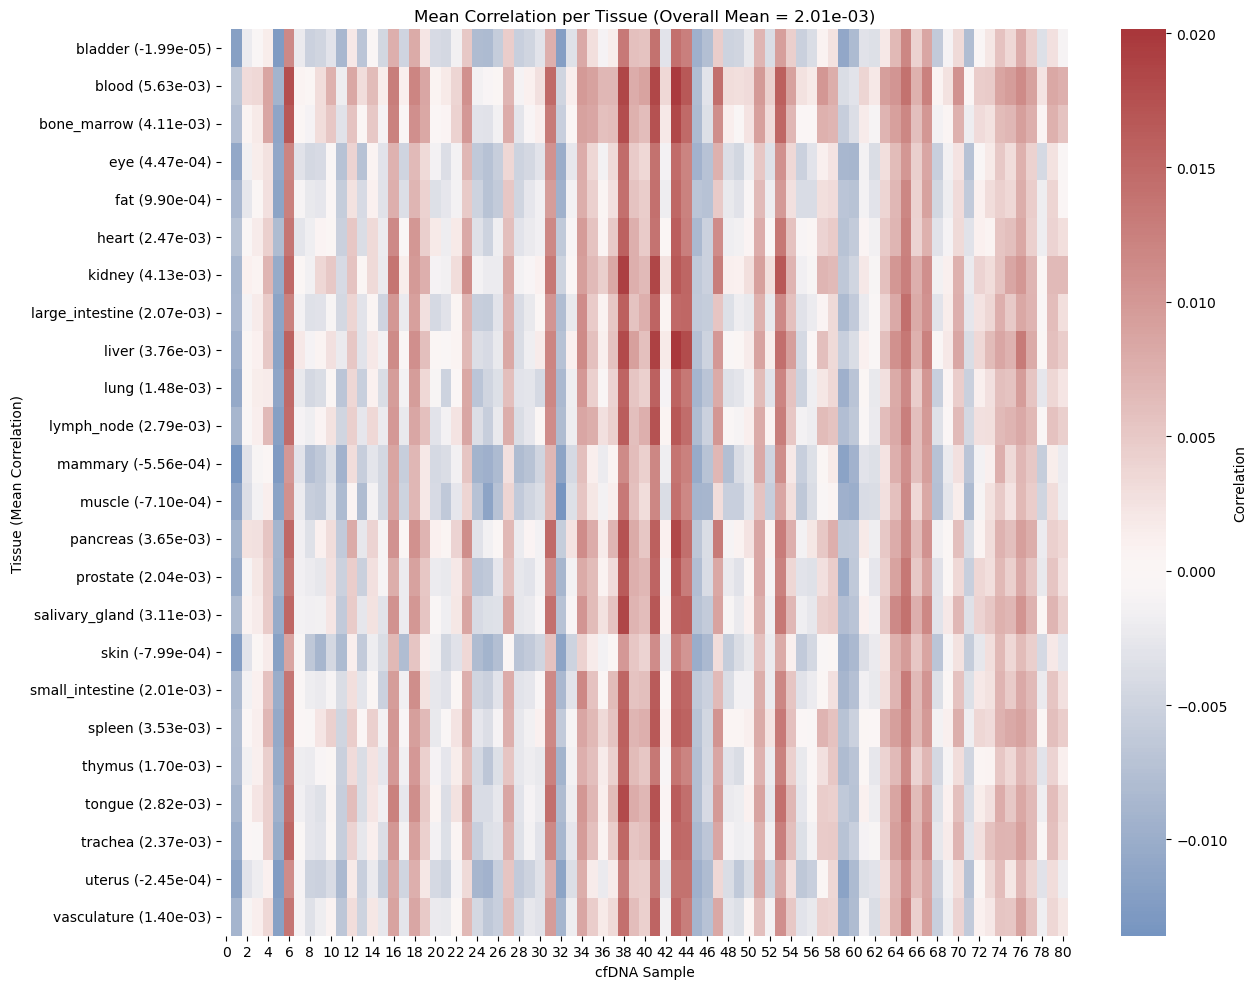

In [20]:
df_heatmap = pd.DataFrame.from_dict(mean_corrs, orient='index')
# Compute mean per tissue
df_heatmap['Mean_Correlation'] = df_heatmap.mean(axis=1)

# Compute overall mean
overall_mean = df_heatmap['Mean_Correlation'].mean()

# Plot
plt.figure(figsize=(13, 10))
sns.heatmap(
    df_heatmap.drop(columns='Mean_Correlation'),
    cmap='vlag',
    center=0,
    annot=False,
    cbar_kws={'label': 'Correlation'},
    yticklabels=True
)

# Update ytick labels with mean correlation
ax = plt.gca()
yticks = ax.get_yticklabels()
for i, tick in enumerate(yticks):
    tissue_name = tick.get_text()
    mean_val = df_heatmap.loc[tissue_name, 'Mean_Correlation']
    tick.set_text(f"{tissue_name} ({mean_val:.2e})")
ax.set_yticklabels(yticks, rotation=0)

# Title with overall mean
plt.title(f"Mean Correlation per Tissue (Overall Mean = {overall_mean:.2e})")
plt.xlabel("cfDNA Sample")
plt.ylabel("Tissue (Mean Correlation)")
plt.tight_layout()
plt.show()